## Name: Sravya Koyi
## ZID: Z1989016

In [3]:
#1
import numpy as np
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train = np.loadtxt('../gisette_trainSet.txt')
y_train = np.loadtxt('../gisette_trainLabels.txt')
X_test = np.loadtxt('../gisette_testSet.txt')
y_test = np.loadtxt('../gisette_testLabels.txt')

knn = KNeighborsClassifier()

param_grid = {'n_neighbors': [1, 3, 5, 7, 9]}

grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

best_k = grid.best_params_['n_neighbors']
print(f"Best k: {best_k}")

knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred = knn_best.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Testing accuracy: {accuracy}")

Best k: 3
Testing accuracy: 0.966


In [4]:
#2
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

pca = PCA()
knn = KNeighborsClassifier()
pipe = Pipeline(steps=[('pca', pca), ('knn', knn)])

param_grid = {
    'pca__n_components': [5, 10, 15, 20],
    'knn__n_neighbors': [1, 3, 5, 7, 9]
}

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

best_k = grid.best_params_['knn__n_neighbors']
best_d = grid.best_params_['pca__n_components']
print(f"Best k: {best_k}, Best d: {best_d}")

pca_best = PCA(n_components=best_d)
X_train_pca = pca_best.fit_transform(X_train)
X_test_pca = pca_best.transform(X_test)

knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_pca, y_train)
y_pred = knn_best.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)
print(f"Testing accuracy: {accuracy}")

Best k: 7, Best d: 20
Testing accuracy: 0.974


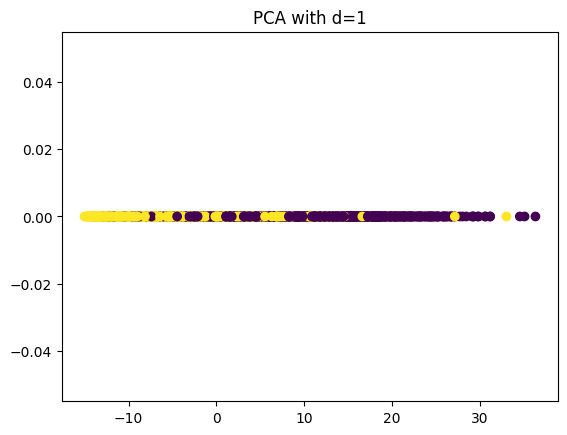

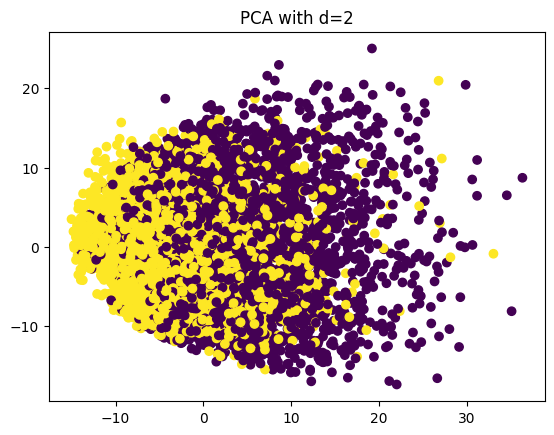

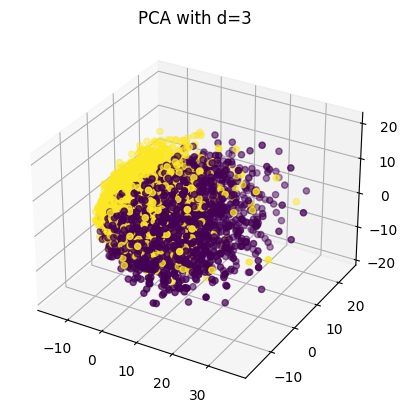

In [6]:
#3
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

for d in [1, 2, 3]:
    pca = PCA(n_components=d)
    X_train_pca = pca.fit_transform(X_train)

    if d == 1:
        plt.figure()
        # plt.scatter(X_train_pca, y_train, c=y_train, cmap='viridis')
        plt.scatter(X_train_pca, np.zeros_like(X_train_pca), c=y_train, cmap='viridis')
        plt.title(f"PCA with d={d}")
        plt.show()

    elif d == 2:
        plt.figure()
        plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
        plt.title(f"PCA with d={d}")
        plt.show()

    elif d == 3:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2], c=y_train, cmap='viridis')
        ax.set_title(f"PCA with d={d}")
        plt.show()

In [7]:
# Problem 3: Regularized Logistic Regression
import numpy as np
from sklearn.datasets import load_svmlight_file
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

data, labels = load_svmlight_file('../sonar_scale.txt')

X = data.toarray()
y = labels

train_indices = -1 + np.loadtxt('../sonar-scale-train-indices.txt', dtype=int)  # Subtract 1 for 0-based indexing
test_indices = -1 + np.loadtxt('../sonar-scale-test-indices.txt', dtype=int)    # Subtract 1 for 0-based indexing

X_train = X[train_indices]
y_train = y[train_indices]
X_test = X[test_indices]
y_test = y[test_indices]

C_values = [0.01, 0.1, 1, 10, 100, 1000]

kf = KFold(n_splits=5, shuffle=True, random_state=42)

training_errors = []
validation_errors = []

for C in C_values:
    train_errors = []
    val_errors = []

    for train_idx, val_idx in kf.split(X_train):
        X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
        y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

        model = LogisticRegression(C=C, penalty='l2', solver='lbfgs')
        model.fit(X_train_fold, y_train_fold)

        y_train_pred = model.predict_proba(X_train_fold)
        train_loss = log_loss(y_train_fold, y_train_pred)
        train_errors.append(train_loss)

        y_val_pred = model.predict_proba(X_val_fold)
        val_loss = log_loss(y_val_fold, y_val_pred)
        val_errors.append(val_loss)

    training_errors.append(np.mean(train_errors))
    validation_errors.append(np.mean(val_errors))

best_C_index = np.argmin(validation_errors)
best_C = C_values[best_C_index]

print(f"Best C: {best_C}")
for i, C in enumerate(C_values):
    print(f"C={C}: Avg Train Error={training_errors[i]}, Avg Val Error={validation_errors[i]}")

model = LogisticRegression(C=best_C, penalty='l2', solver='lbfgs')
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_test_pred)
print(f"Testing Accuracy: {accuracy}")


Best C: 0.1
C=0.01: Avg Train Error=0.5977690445474022, Avg Val Error=0.6227679850407799
C=0.1: Avg Train Error=0.42861270807749696, Avg Val Error=0.509215799880236
C=1: Avg Train Error=0.25982567354336694, Avg Val Error=0.5163135417148244
C=10: Avg Train Error=0.11443364489153973, Avg Val Error=0.7715972902505804
C=100: Avg Train Error=0.030578541309116504, Avg Val Error=1.4811694109999296
C=1000: Avg Train Error=0.005691269722347687, Avg Val Error=2.651054226404642
Testing Accuracy: 0.8103448275862069
